# Breast Cancer Dataset
## Background:

   Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.
    
   Early diagnosis significantly increases the chances of survival. The key challenges against its detection is how to classify tumors into malignant(cancer) or benign(not cancer). A tumor is considered malignant (cancer) if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.
    
   Machine Learning techniques can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer with 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.




    

## Task

   In this notebook, the task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.
   
   Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
   
   
## Attribute Information:
   
1.  ID number 
2.  Diagnosis (M = malignant, B = benign) 

## Ten real-valued features are computed for each cell nucleus:

1. Radius (mean of distances from center to points on the perimeter) 
2. Texture (standard deviation of gray-scale values) 
3. Perimeter 
4. Area 
5. Smoothness (local variation in radius lengths) 
6. Compactness (perimeter^2 / area - 1.0) 
7. Concavity (severity of concave portions of the contour) 
8. Concave points (number of concave portions of the contour) 
9. Symmetry 
10. Fractal dimension ("coastline approximation" - 1)




# Loading packages and data
Import needed Python libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
# Import metric libraries
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format. - Pandas!

# Let's view the data in a dataframe.

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

# Let's Explore Our Dataset

In [4]:
df_cancer.shape

(569, 31)

As we can see,we have 596 rows (Instances) and 31 columns (30 Features)

In [5]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Above is the name of each columns in our dataframe.

# The next step is to Visualize our data

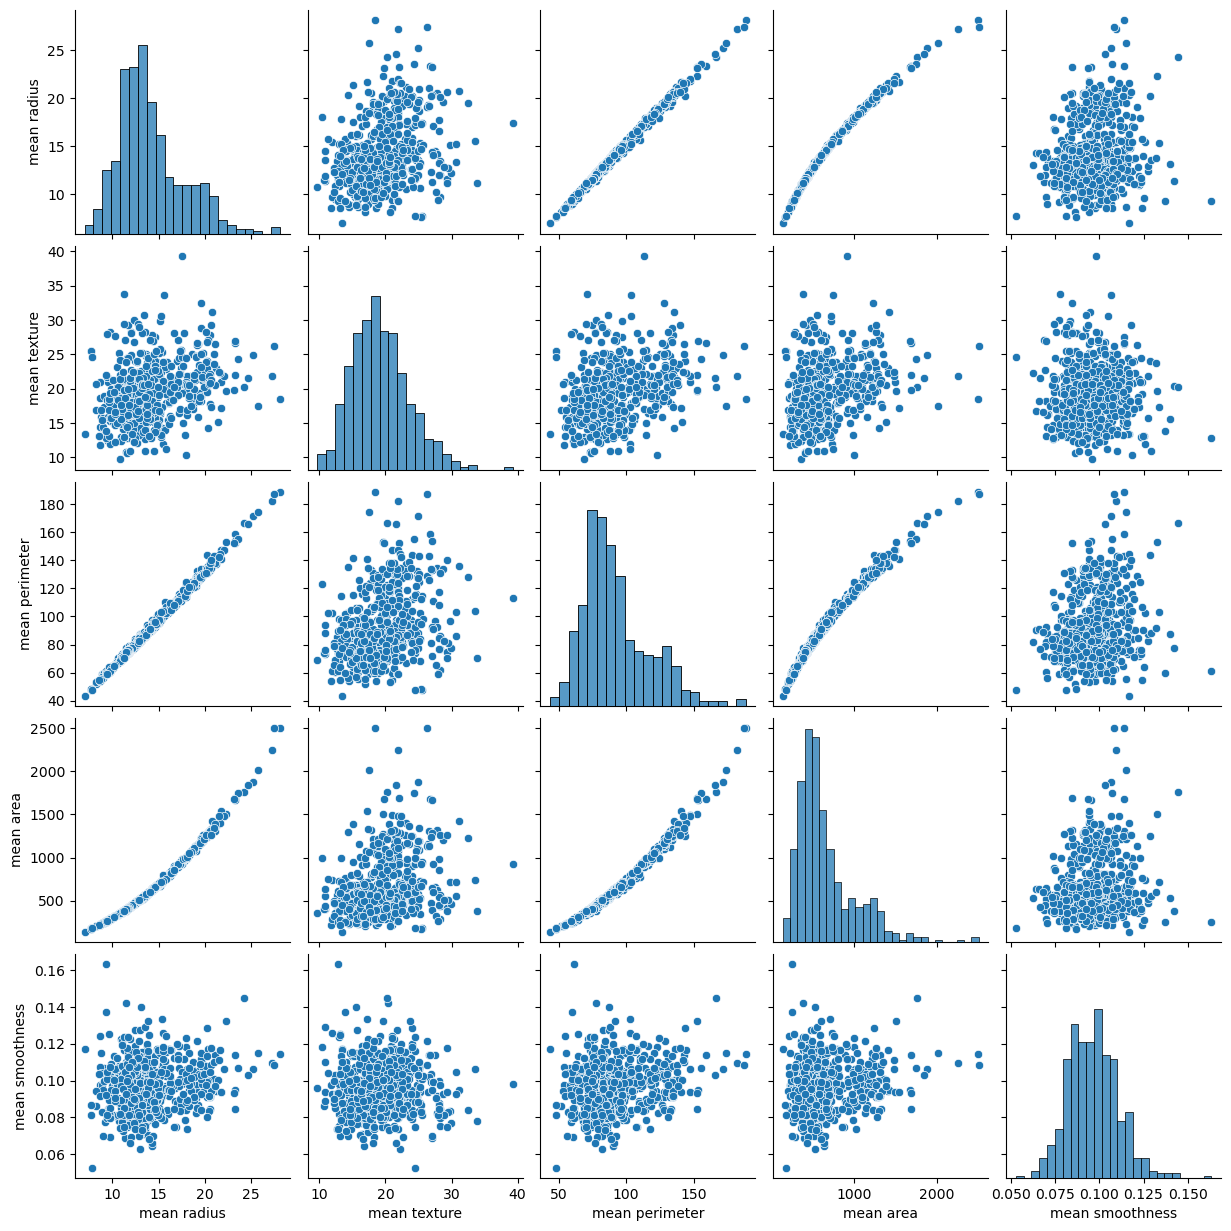

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

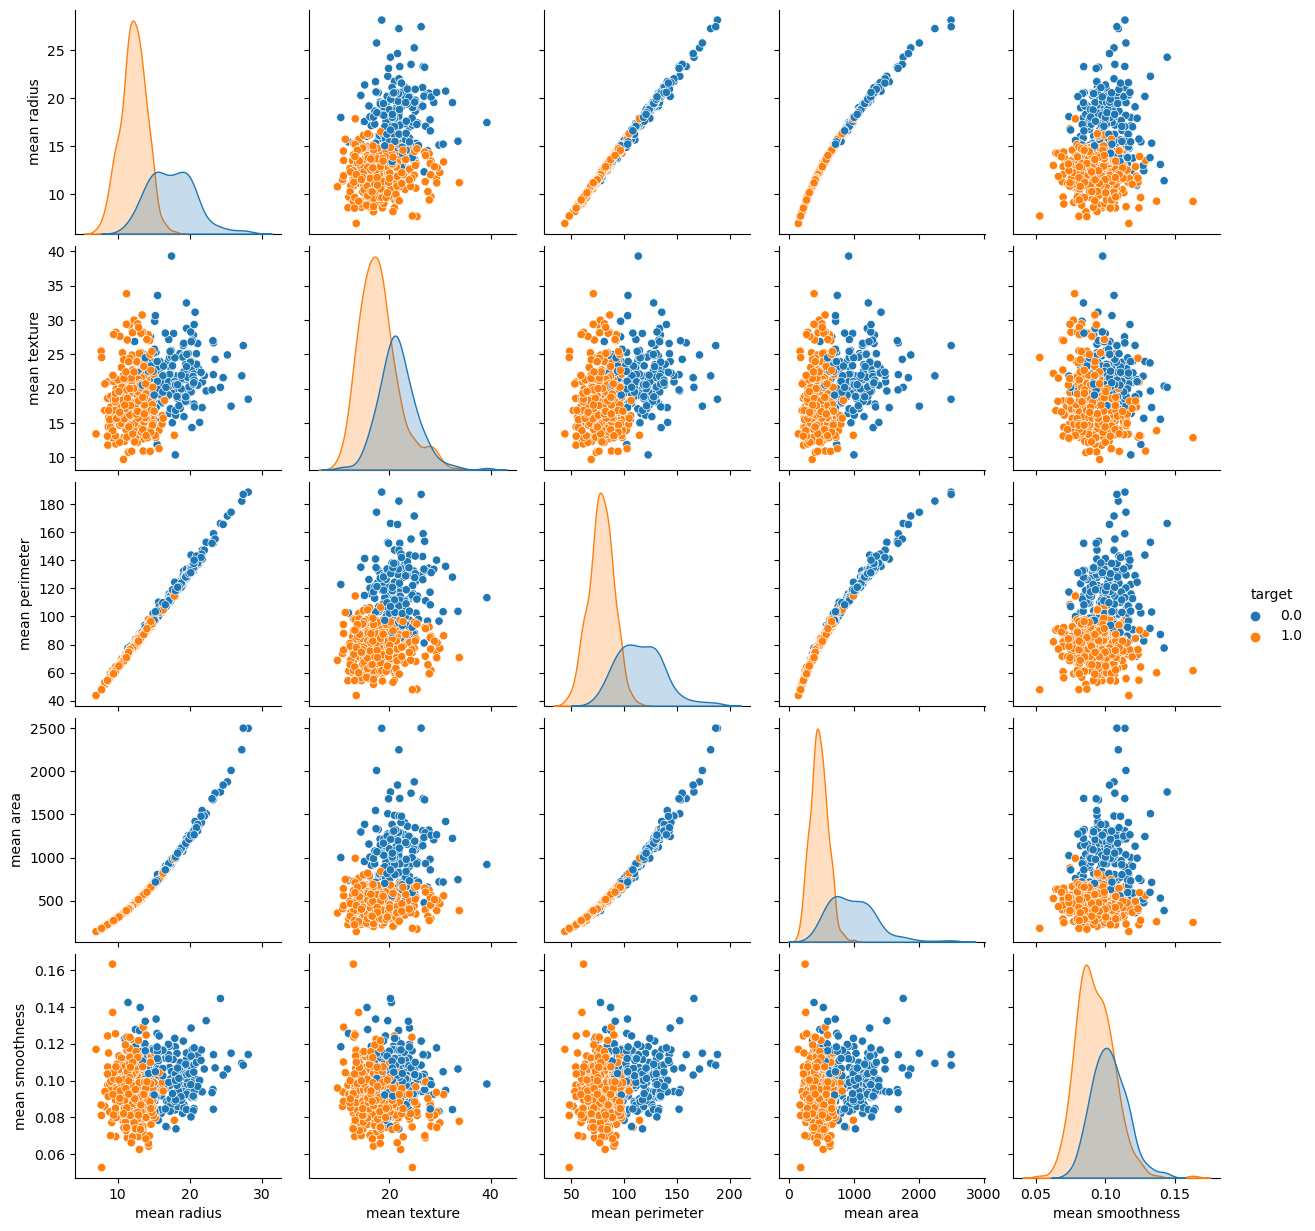

In [7]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

# How many Benign and Malignant do we have in our dataset?

In [8]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

# Let's check the correlation between our features 

<Axes: >

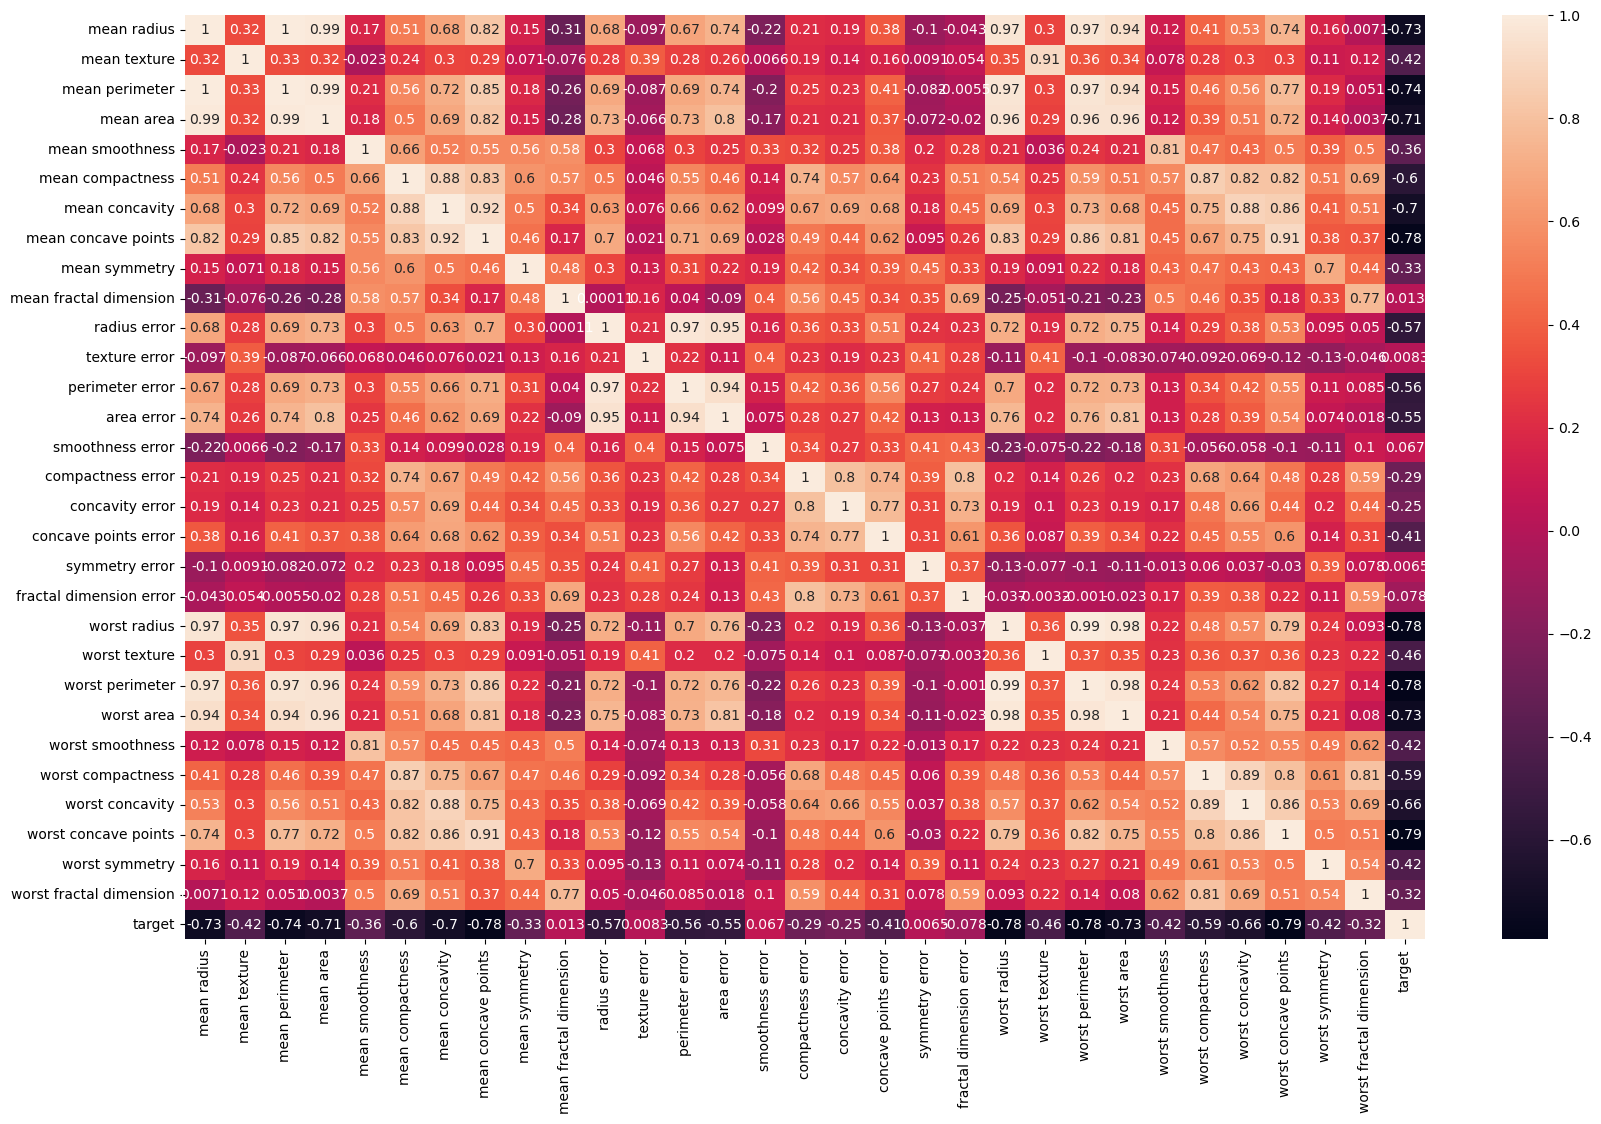

In [9]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

There is a strong correlation between the mean radius and mean perimeter, mean area and mean perimeter

# Introduction to Modeling: Suport Vector Machines (SVM)¶

### What is the difference between model prediction and inference?

- Inference is judging what the relationship, if any, there is between the data and the output.
- Prediction is making guesses about future scenarios based on data and a model constructed on that data.

### What is a Support Vector Machine (SVM)?

A Support Vector Machine (SVM) is a binary linear classifiier whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection. 

SVM is well suited for classification of complex but small or medium sized datasets.

# The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different [Kernel](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

# The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing [Kernel functions](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) and the regularization term is crucial.
- SVMs do not directly provide probability estimates.

# Model Training

### From our dataset, let's create the target y and predictor X matrices

- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [10]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

### Create the training and testing data

Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.
Let's split our data using 80% for training and the remaining 20% for testing.

Use a random_state of 20 to ensure consistency in notebook

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Let now check the size our training and testing data.

In [13]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (426, 30)
The size of our testing "X" (input features) is (143, 30)
The size of our training "y" (output feature) is (426,)
The size of our testing "y" (output features) is (143,)


Import and initialise Support Vector Machine (SVM) Model 

In [14]:
from sklearn.svm import SVC
svc_model = SVC()

Now, let's train/fit our SVM model with our "training" dataset.

In [15]:
svc_model.fit(X_train, y_train)

SVC()

### Let's use our trained model to make a prediction using our testing data
Score the model with the test set

In [16]:
svc_model.score(X_test, y_test)

0.9370629370629371

### However, when trying to choose between different models we should be using a cross_val_score

I am going to create a list that contains the mean of cross_val_score of all the models that are built. I'll also create another list which will keep a record of each algorithm I tried.

In [17]:
cross_val_scores_mean = []
model_list = []
test_set_scores = []

In [18]:
mean = cross_val_score(svc_model, X_train, y_train).mean()
cross_val_scores_mean.append(mean)
model_list.append("SVM Default params: ")
cross_val_scores_mean

[0.8990150478796168]

Make a set of predictions from the test set

In [19]:
# your code here
y_predict = svc_model.predict(X_test)
score = svc_model.score(X_test, y_test)
test_set_scores.append(score)
print("SVM Default params: ", score)

SVM Default params:  0.9370629370629371


Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use a confusion matrix for this comparison

<a id='confusion-matrix'></a>

### The confusion matrix

---

The confusion matrix is a table representing the performance of your model to classify labels correctly.

**A confusion matrix for a binary classification task:**

|   | Predicted Negative |   Predicted Positive |
|---|---|---|
|**Actual Negative**  | True Negative (TN) | False Positive (FP)  |   
|**Actual Positive** | False Negative (FN)  | True Positive (TP)  |    


In a binary classifier, the "true" class is typically labeled with 1 and the "false" class is labeled with 0. 

> **True Positive**: A positive class observation (1) is correctly classified as positive by the model.

> **False Positive**: A negative class observation (0) is incorrectly classified as positive.

> **True Negative**: A negative class observation is correctly classified as negative.

> **False Negative**: A positive class observation is incorrectly classified as negative.

Columns of the confusion matrix sum to the predictions by class. Rows of the matrix sum to the actual values within each class. You may encounter confusion matrices where the actual is in columns and the predicted is in the rows: the meaning is the same but the table will be reoriented.

> **Note:** Remembering what the cells in the confusion matrix represents can be a little tricky. The first word (True or False) indicates whether or not the model was correct. The second word (Positive or Negative) indicates the *model's guess* (not the actual label!).

### Let's create a confusion matrix for our classfier's performance on the test dataset.

In [20]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
confusion

,predicted_healthy,predicted_cancer
is_healthy,45,8
is_cancer,1,89


<Axes: >

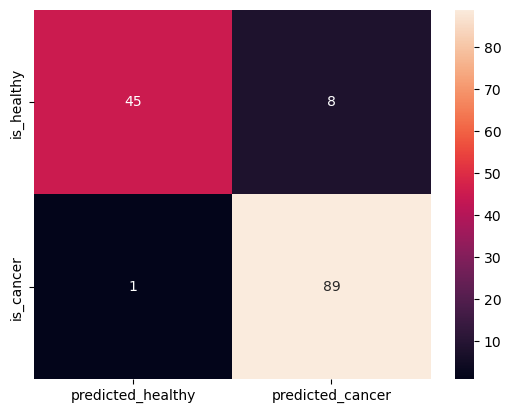

In [21]:
sns.heatmap(confusion, annot=True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91        53
         1.0       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



Let's explore ways that maybe will improve the performance of our model.

## Improving our Model

The first process we will try is by Normalizing our data

Data Normalization is a feature scaling process that brings all values into range [0,1]

X' = (X-X_min) / (X_max - X_min)-----> X_range

### Normalize Training Data with StandardScaler

Firstly, we'll normalise using StandardScaler and record it's cross_val_score_mean

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Create a pipeline using StandardScaler
pipeline = make_pipeline(StandardScaler(), SVC())
pipeline.fit(X_train, y_train)  #Run StandardScaler on the data

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [25]:
mean = cross_val_score(pipeline, X_train, y_train).mean()
cross_val_scores_mean.append(mean)
model_list.append("SVM Default params with StandardScaler")
cross_val_scores_mean

[0.8990150478796168, 0.9718194254445965]

In [26]:
y_predict = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)
test_set_scores.append(score)
print("SVM Default params with StandardScaler: ", score)

SVM Default params with StandardScaler:  0.965034965034965


#### SVM classification report with normalized data

In [27]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
confusion

,predicted_healthy,predicted_cancer
is_healthy,50,3
is_cancer,2,88


<Axes: >

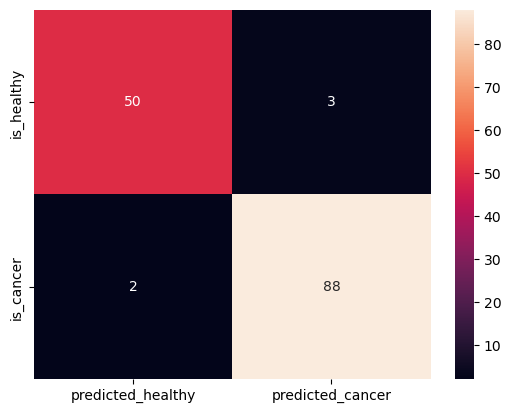

In [28]:
sns.heatmap(confusion,annot=True,fmt="d")

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        53
         1.0       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



### Now using MinMaxScaler

In [30]:
pipeline = make_pipeline(MinMaxScaler(), SVC())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [31]:
mean = cross_val_score(pipeline, X_train, y_train).mean()
cross_val_scores_mean.append(mean)
model_list.append("SVM Default params with MinMaxScaler: ")
cross_val_scores_mean

[0.8990150478796168, 0.9718194254445965, 0.9812311901504789]

In [32]:
y_predict = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)
test_set_scores.append(score)
print("SVM Default params with MinMaxScaler: ", score)

SVM Default params with MinMaxScaler:  0.972027972027972


In [33]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
confusion

,predicted_healthy,predicted_cancer
is_healthy,50,3
is_cancer,1,89


We always make selections based on the cross_val_score. Remember the test scores should be left until the end for final evaluation

## Which is the highest one so far?

In [34]:
for i in range(len(model_list)):
    print(model_list[i], "- Validation score: ", cross_val_scores_mean[i], "- Test score: ", test_set_scores[i])


SVM Default params:  - Validation score:  0.8990150478796168 - Test score:  0.9370629370629371
SVM Default params with StandardScaler - Validation score:  0.9718194254445965 - Test score:  0.965034965034965
SVM Default params with MinMaxScaler:  - Validation score:  0.9812311901504789 - Test score:  0.972027972027972


# Further Model Improvement

The search for the optimal set of hyperparameters is called gridsearching.

Gridsearching gets its name from the fact that we are searching over a "grid" of parameters. For example, imagine the alpha hyperparameters on the x-axis and fit_intercept on the y-axis, and we need to test all points on the grid.

<a id='searching'></a>

## Searching for the best hyperparameters

---

Let's see if we can improve on our model by searching for the best hyperparameters.

We would need to evaluate on the training data the set of hyperparameters that perform best, and then use this set of hyperparameters to fit the final model and score on the testing set.


## Gridsearch Model
We'll include a StandardScaler too

In [35]:
pipeline_search = make_pipeline(StandardScaler(), SVC())

In [36]:
param_grid = {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [1, 0.1, 0.01, 0.001], 'svc__kernel': ['linear','rbf']} 

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline_search, param_grid, refit=True, verbose=4, n_jobs=-1)

This may take a while, n_jobs=-1 ensures it uses all your CPU threads but it will slow down your computer as CPU usage will be high

In [38]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['linear', 'rbf']},
             verbose=4)

**Let's print out the "grid" with the best parameter**

In [39]:
print (grid.best_estimator_)
print (grid.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.01))])
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


## cross val score storing

Don't use the cross_val_score method on grid, this will make it do all 160 fits again and search for best parameters again

This is due to the fact that cross_val_score calls grid.fit a lot of times which we certainly do not want

GridSearchCV has already got us a cross_val_score, so we can just use that!

In [40]:
cross_val_scores_mean.append(grid.best_score_)
model_list.append("SVM Grid search params with StandardScaler: ")
cross_val_scores_mean

[0.8990150478796168,
 0.9718194254445965,
 0.9812311901504789,
 0.9858823529411765]

## In notes I said: we should build the model over the entire training set after picking the parameters

GridSearchCV give the best_params so we could retrain entire training set with new parameters and refit that way


However, we don't have to! Notice the option refit=True, this does that for us and the end result is that grid is the model we can then use exactly the same as all other models

grid.predict, grid.score, etc

In [41]:
grid_predictions = grid.predict(X_test)
score = grid.score(X_test, y_test)
test_set_scores.append(score)
print("SVM Grid search params with StandardScaler: ", score)

SVM Grid search params with StandardScaler:  0.9790209790209791


In [42]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
confusion

,predicted_healthy,predicted_cancer
is_healthy,51,2
is_cancer,1,89


<Axes: >

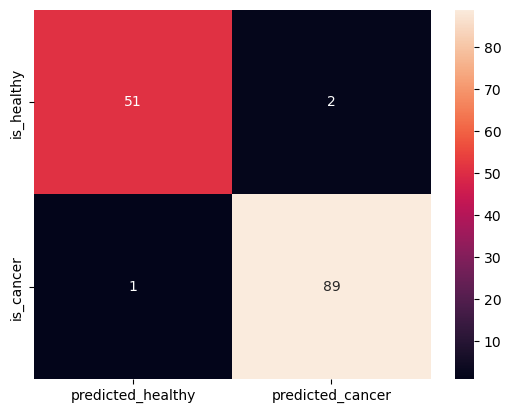

In [43]:
sns.heatmap(confusion, annot=True)

In [44]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        53
         1.0       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Last let's do GridSearch on MinMaxScaler

In [45]:
pipeline_search = make_pipeline(MinMaxScaler(), SVC())

In [46]:
grid_MMscaler = GridSearchCV(pipeline_search, param_grid, refit=True, verbose=4, n_jobs=-1)

In [47]:
grid_MMscaler.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['linear', 'rbf']},
             verbose=4)

In [48]:
print (grid_MMscaler.best_estimator_)
print (grid.best_params_)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=1, gamma=1))])
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [49]:
cross_val_scores_mean.append(grid_MMscaler.best_score_)
model_list.append("SVM Grid search params with MinMaxScaler: ")
cross_val_scores_mean

[0.8990150478796168,
 0.9718194254445965,
 0.9812311901504789,
 0.9858823529411765,
 0.9812311901504789]

In [50]:
score = grid_MMscaler.score(X_test, y_test)
test_set_scores.append(score)
print("SVM Grid search params with MinMaxScaler: ", score)

SVM Grid search params with MinMaxScaler:  0.972027972027972


In [51]:
for i in range(len(model_list)):
    print(model_list[i], "- Validation score: ", cross_val_scores_mean[i], "- Test score: ", test_set_scores[i])

print(np.argmax(cross_val_scores_mean))
print(np.argmax(test_set_scores))

SVM Default params:  - Validation score:  0.8990150478796168 - Test score:  0.9370629370629371
SVM Default params with StandardScaler - Validation score:  0.9718194254445965 - Test score:  0.965034965034965
SVM Default params with MinMaxScaler:  - Validation score:  0.9812311901504789 - Test score:  0.972027972027972
SVM Grid search params with StandardScaler:  - Validation score:  0.9858823529411765 - Test score:  0.9790209790209791
SVM Grid search params with MinMaxScaler:  - Validation score:  0.9812311901504789 - Test score:  0.972027972027972
3
3


## Read, extremely important

### Which is the best model? Well we select it by the best CROSS VALIDATION SCORE

This is to ensure the test data did not influence the choice in model.

Use Validation scores to select models and hyperparameters. Only use test data for final evaluation

# Sources:

1. http://scikit-learn.org/stable/modules/svm.html